In [49]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from keras.utils import to_categorical
from tensorflow.keras import Input
from tensorflow.data import Dataset
import pandas as pd
import numpy as np
import itertools
import csv
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt

In [50]:
df = pd.read_csv('new_way.csv')
df['action'].count()

527

In [51]:
x = df.drop('action',axis=1)
y = df.action

In [52]:
lb = LabelEncoder()
y = lb.fit_transform(y)
df['label'] = y

In [53]:
lb.classes_

array(['boink', 'fel', 'nine', 'zero'], dtype=object)

In [54]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0, stratify = y)

In [55]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [56]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((421, 15), (106, 15), (421, 4), (106, 4))

In [57]:
model = Sequential()
model.add(Input(shape=(15)))
model.add(Dense(32, activation='relu'))
model.add(Dense(y_train.shape[1], activation="softmax"))

In [58]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 32)                512       
                                                                 
 dense_9 (Dense)             (None, 4)                 132       
                                                                 
Total params: 644
Trainable params: 644
Non-trainable params: 0
_________________________________________________________________


In [59]:
history = model.fit(
    x_train,
    y_train,
    steps_per_epoch = 5,
    epochs = 40,
    validation_data = (x_test, y_test),
    verbose=1
)

Epoch 1/40
5/5 [==============================] - ETA: 0s - loss: 0.9279 - accuracy: 0.9050

2022-11-21 20:37:29.327280: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


5/5 [==============================] - 0s 52ms/step - loss: 0.9279 - accuracy: 0.9050 - val_loss: 0.3122 - val_accuracy: 1.0000
Epoch 2/40
5/5 [==============================] - 0s 21ms/step - loss: 0.5987 - accuracy: 0.9976 - val_loss: 0.3105 - val_accuracy: 1.0000
Epoch 3/40
1/5 [=====>........................] - ETA: 0s - loss: 0.2420 - accuracy: 1.0000

2022-11-21 20:37:29.541094: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


5/5 [==============================] - 0s 21ms/step - loss: 0.3222 - accuracy: 0.9976 - val_loss: 0.3088 - val_accuracy: 1.0000
Epoch 4/40
5/5 [==============================] - 0s 21ms/step - loss: 0.3039 - accuracy: 1.0000 - val_loss: 0.3071 - val_accuracy: 1.0000
Epoch 5/40
5/5 [==============================] - 0s 21ms/step - loss: 0.3022 - accuracy: 1.0000 - val_loss: 0.3054 - val_accuracy: 1.0000
Epoch 6/40
5/5 [==============================] - 0s 20ms/step - loss: 0.3005 - accuracy: 1.0000 - val_loss: 0.3037 - val_accuracy: 1.0000
Epoch 7/40
5/5 [==============================] - 0s 21ms/step - loss: 0.2989 - accuracy: 1.0000 - val_loss: 0.3020 - val_accuracy: 1.0000
Epoch 8/40
5/5 [==============================] - 0s 20ms/step - loss: 0.2971 - accuracy: 1.0000 - val_loss: 0.3003 - val_accuracy: 1.0000
Epoch 9/40
5/5 [==============================] - 0s 20ms/step - loss: 0.2955 - accuracy: 1.0000 - val_loss: 0.2986 - val_accuracy: 1.0000
Epoch 10/40
5/5 [=====================

In [60]:
def plot_learningCurve(history, epochs):
  # Plot training & validation accuracy values
  epoch_range = range(1, epochs+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

  # Plot training & validation loss values
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

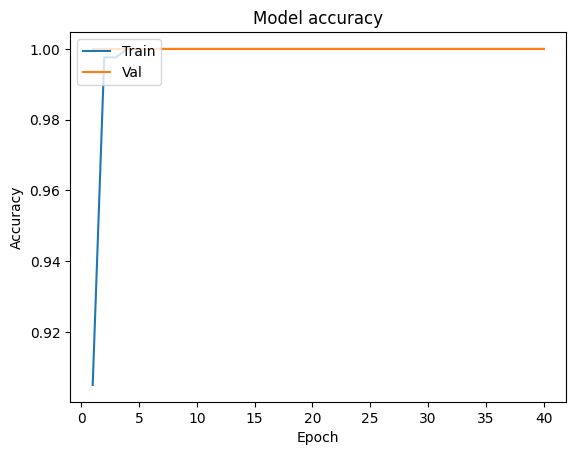

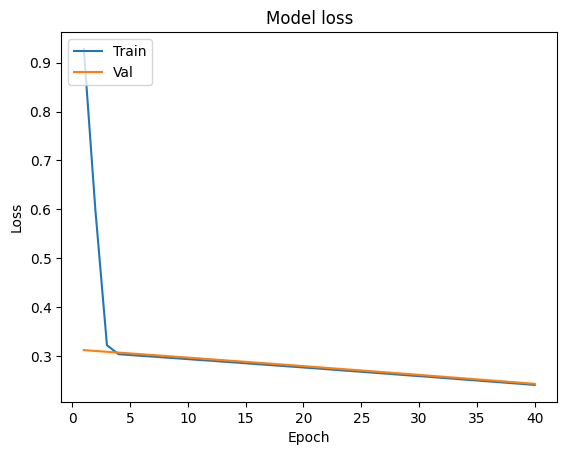

In [61]:
plot_learningCurve(history, 40)

In [62]:
test_X = np.array([
    [-406.325867,-327.913513,-169.621292,-105.695808,-266.762054,-112.666458,68.620850,-135.545349,3.377147,180.597488,-28.868486,43.224567,418.830933,280.534210,641.699524],
    [1320.943481,1054.197388,1277.395508,-316.596161,-115.715225,645.914490,-293.359589,-117.338379,746.761230,-185.270874,60.773712,834.030273,421.568390,282.367767,645.893616],
    [-383.235077,-311.100037,-197.631592,-107.004318,-235.231262,-116.203461,421.568390,282.367767,645.893616,421.568390,282.367767,645.893616,421.568390,282.367767,645.893616],
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [1321.087402,1054.216675,1277.468872,-317.182556,-117.585640,643.408936,-293.577362,-117.764130,746.351929,-187.409271,56.366665,831.326477,421.568390,282.367767,645.893616],
    [1312.798584,1047.551392,1269.233154,-315.396240,-117.270004,638.171997,-291.300446,-116.279694,742.242371,-186.199646,56.229809,825.841125,418.830933,280.534210,641.699524],
    [1312.811523,1047.273438,1269.202637,-315.684814,-117.178726,638.912842,-290.455994,-115.492928,743.165222,-186.414749,55.449490,825.548950,418.830933,280.534210,641.699524],
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [1312.833130,1047.422729,1269.133179,-315.423615,-117.150795,639.403870,-290.824249,-116.106712,742.619629,-186.572784,55.422165,825.221924,418.830933,280.534210,641.699524],
    [1321.549316,1046.301880,1277.417969,-351.697235,-175.049469,563.982727,-309.408997,-121.954727,722.247742,-218.011322,25.565254,782.218262,421.568390,282.367767,645.893616],
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [1316.986938,1036.482056,1274.795288,-365.841003,-200.822876,520.388123,-314.164551,-122.020241,707.959534,-229.205444,17.490072,759.195312,418.830933,280.534210,641.699524],
    [1327.660156,1043.612183,1287.544922,-371.495026,-206.819122,515.230835,-318.456543,-121.864571,709.689758,-232.852890,17.775621,759.463318,421.568390,282.367767,645.893616],
    [1320.145386,1036.028320,1280.863159,-372.233978,-209.604691,506.293121,-318.277252,-122.168648,701.931641,-233.700394,15.901367,750.742249,418.830933,280.534210,641.699524],
    [1320.010376,1035.806519,1280.243164,-373.965454,-210.666306,506.634094,-317.075134,-120.870102,703.736511,-234.436981,15.467718,750.518066,418.830933,280.534210,641.699524],
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [1322.411011,1035.252319,1275.233398,-368.881866,-204.410355,524.392639,-316.768860,-125.999161,711.618896,-233.246735,10.529224,760.487915,421.568390,282.367767,645.893616],
    [1314.253906,1026.764648,1257.505493,-362.358154,-196.420059,542.371033,-312.217865,-129.137466,718.170227,-230.745117,3.968786,766.347595,421.568390,282.367767,645.893616],
    [-370.806702,-296.183807,-180.345581,-110.419876,-240.254776,-118.526176,421.568390,282.367767,645.893616,421.568390,282.367767,645.893616,421.568390,282.367767,645.893616],
    [-371.306366,-294.510223,-181.938309,-130.909012,-249.784012,-132.658234,421.568390,282.367767,645.893616,421.568390,282.367767,645.893616,421.568390,282.367767,645.893616],
    [-383.235077,-311.100037,-197.631592,-107.004318,-235.231262,-116.203461,421.568390,282.367767,645.893616,421.568390,282.367767,645.893616,421.568390,282.367767,645.893616],
    [999,-999,999,-999,999,-999,999,-999,999,-999,999,-999,999,-999,999],
    [999,-999,999,-999,999,-999,999,-999,999,-999,999,-999,999,-999,999],
    [999,-999,999,-999,999,-999,999,-999,999,-999,999,-999,999,-999,999],
    [999,-999,999,-999,999,-999,999,-999,999,-999,999,-999,999,-999,999],
    [999,-999,999,-999,999,-999,999,-999,999,-999,999,-999,999,-999,999],
    [999,-999,999,-999,999,-999,999,-999,999,-999,999,-999,999,-999,999]
])
np.set_printoptions(precision=4)
np.set_printoptions(suppress=True)
Y = model.predict_on_batch(test_X)
print(Y*100)
# array(['boink', 'fel', 'zero'], dtype=object)

2022-11-21 20:37:38.874801: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


[[  0.     100.       0.       0.    ]
 [100.       0.       0.       0.    ]
 [  0.     100.       0.       0.    ]
 [ 21.2568  23.9208  20.6851  34.1373]
 [100.       0.       0.       0.    ]
 [100.       0.       0.       0.    ]
 [100.       0.       0.       0.    ]
 [ 21.2568  23.9208  20.6851  34.1373]
 [100.       0.       0.       0.    ]
 [100.       0.       0.       0.    ]
 [ 21.2568  23.9208  20.6851  34.1373]
 [100.       0.       0.       0.    ]
 [100.       0.       0.       0.    ]
 [100.       0.       0.       0.    ]
 [100.       0.       0.       0.    ]
 [ 21.2568  23.9208  20.6851  34.1373]
 [100.       0.       0.       0.    ]
 [100.       0.       0.       0.    ]
 [  0.     100.       0.       0.    ]
 [  0.     100.       0.       0.    ]
 [  0.     100.       0.       0.    ]
 [  0.       0.     100.       0.    ]
 [  0.       0.     100.       0.    ]
 [  0.       0.     100.       0.    ]
 [  0.       0.     100.       0.    ]
 [  0.       0.     100. 

In [63]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
def representative_dataset_gen():
    for _ in range(10000):
        yield [
            np.array(
                [np.random.uniform(), np.random.uniform()]
            , dtype=np.float32)
        ]
converter.representative_dataset = representative_dataset_gen
converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS_INT8]
tflite_quant_model = converter.convert()
open("converted_model.tflite", "wb").write(tflite_quant_model)

INFO:tensorflow:Assets written to: /var/folders/fx/5gyl_pgs2094_xlx9szcscp00000gn/T/tmpuf3d513m/assets


INFO:tensorflow:Assets written to: /var/folders/fx/5gyl_pgs2094_xlx9szcscp00000gn/T/tmpuf3d513m/assets
/Users/csabakoos/miniforge3/envs/tf/lib/python3.9/site-packages/tensorflow/lite/python/convert.py:766: UserWarning: Statistics for quantized inputs were expected, but not specified; continuing anyway.
  warnings.warn("Statistics for quantized inputs were expected, but not "
2022-11-21 20:38:24.578224: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:362] Ignored output_format.
2022-11-21 20:38:24.578238: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:365] Ignored drop_control_dependency.
2022-11-21 20:38:24.578337: I tensorflow/cc/saved_model/reader.cc:45] Reading SavedModel from: /var/folders/fx/5gyl_pgs2094_xlx9szcscp00000gn/T/tmpuf3d513m
2022-11-21 20:38:24.579093: I tensorflow/cc/saved_model/reader.cc:89] Reading meta graph with tags { serve }
2022-11-21 20:38:24.579101: I tensorflow/cc/saved_model/reader.cc:130] Reading SavedModel debug inf

4284

In [ ]:
# xxd -i converted_model.tflite > model_data.cc